In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helper import (plot_exponential_data, 
                    plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

In [16]:
from helper import boston_dataframe
boston_data = boston_dataframe()

In [17]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


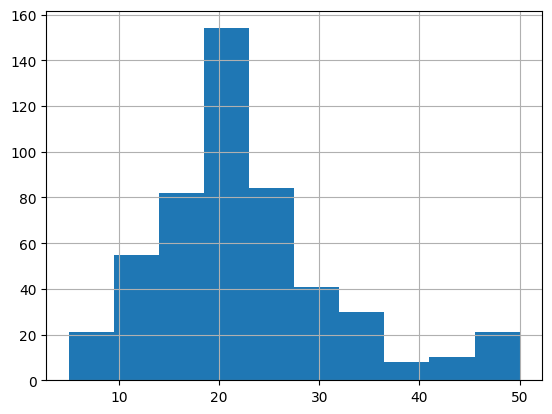

In [ ]:
# Display histogram of target variable
# df['column_name'].hist(
#     bins=10,          # số thanh/bar trong histogram
#     grid=True,        # hiển thị lưới hay không
#     figsize=(8,6),    # kích thước biểu đồ (width, height)
#     color='blue',     # màu của thanh
#     alpha=0.7,        # độ trong suốt của thanh (0→trong suốt, 1→đậm)
#     density=False     # True → chuẩn hóa thành mật độ xác suất, False → số lượng
# )
boston_data.MEDV.hist();

In [ ]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [ ]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696098e-20)

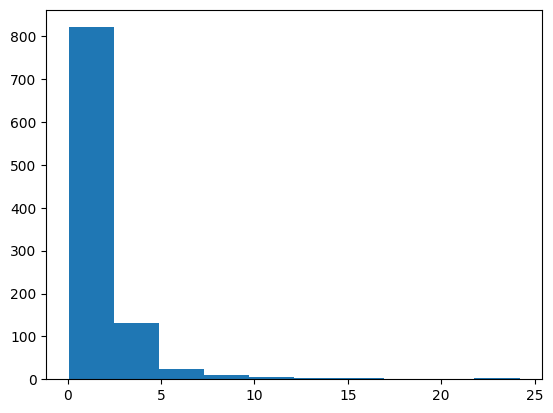

In [34]:
# Tạo và hiển thị dữ liệu có phân phối mũ (exponential) để demo log transform

data = plot_exponential_data()

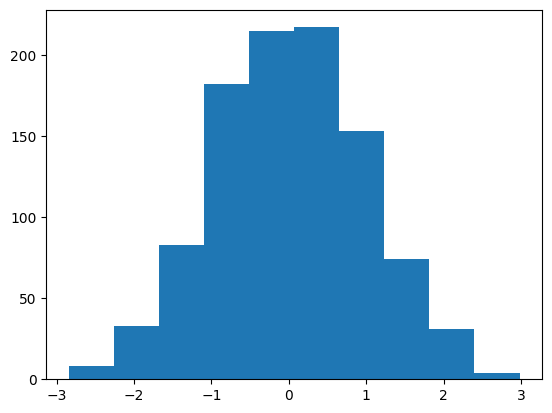

In [ ]:
# Log-transform the data
# plt.hist(np.log(data))
# plt.hist(...)           → vẽ histogram bằng Matplotlib
# np.log(data)            → lấy logarit tự nhiên của dữ liệu trước khi vẽ
# data                    → mảng 1 chiều chứa dữ liệu (numpy array, list, Pandas Series)
# Tham số có thể thêm:
#   bins    → số thanh/bar trong histogram (mặc định 10)
#   color   → màu thanh
#   alpha   → độ trong suốt của thanh (0 → trong suốt, 1 → đậm)
#   density → True → chuẩn hóa thành mật độ, False → số lượng
plt.hist(np.log(data));

**Apply transform to Boston data:**

In [ ]:
# Take the natural logarithm of a column
# Syntax: log_column = np.log(DataFrame['column_name'])
# DataFrame['column_name']: Pandas Series cần biến đổi
# np.log(...)            : hàm logarit tự nhiên của numpy
# log_column             : mảng/log-transformed Series kết quả          
log_medv = np.log(boston_data.MEDV)

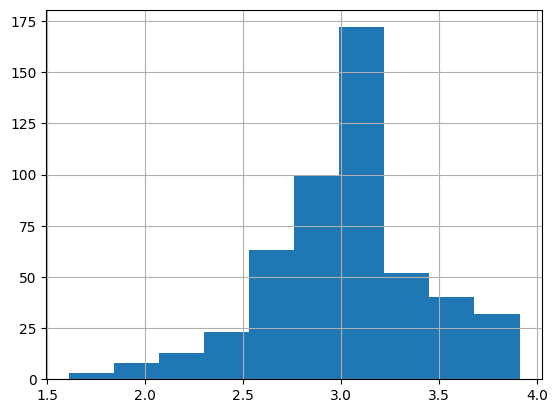

In [ ]:

log_medv.hist();

In [35]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

Conclusion: closer, but still not normal.

### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

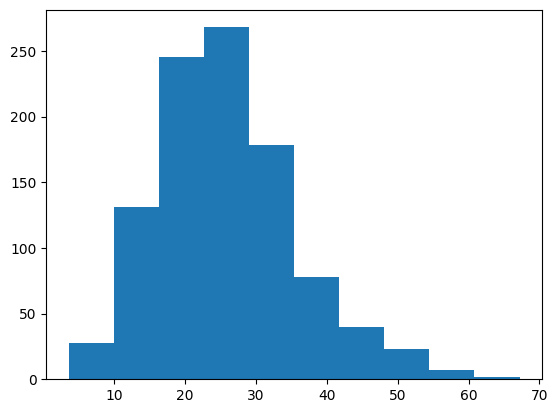

In [36]:
# Tạo dữ liệu mẫu có phân phối bình phương để demo sqrt transform

# Mục đích: Hiểu cách sqrt transform hoạt động trước khi áp dụng cho Boston data<VSCode.Cell id="#VSC-a090a86e" language="python">
# Tạo dữ liệu mẫu có phân phối bình phương để demo sqrt transform
# Mục đích: Hiểu cách sqrt transform hoạt động trước khi áp dụng cho Boston data
data = plot_square_normal_data()

Slightly skewed right.

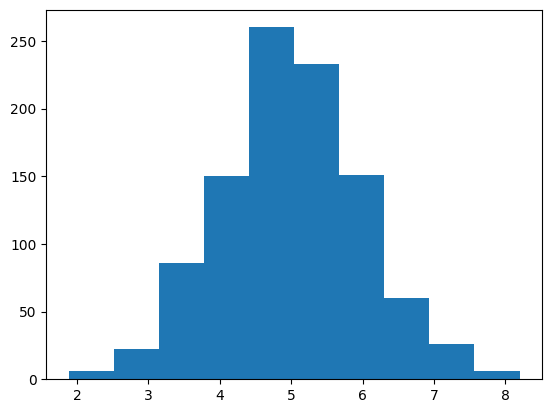

In [37]:
plt.hist(np.sqrt(data));

Apply the square root transformation to the Boston data target and test whether the result is normally distributed.

In [38]:
pass 

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

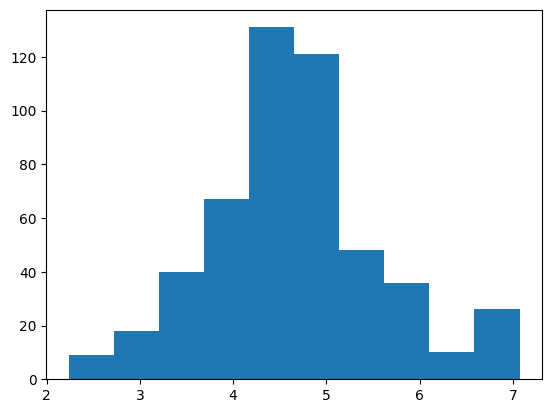

In [39]:
# Instructor Solution

sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

In [40]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

### Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [41]:
from scipy.stats import boxcox

In [42]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [43]:
lam

0.21662090066621686

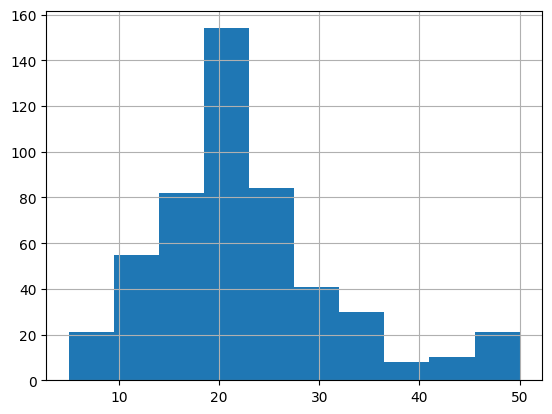

In [44]:
boston_data['MEDV'].hist();

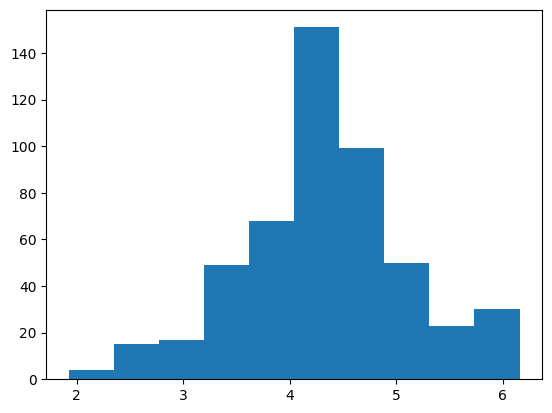

In [45]:
plt.hist(boxcox_medv);

In [46]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528777459233, pvalue=0.10468866918093514)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

### Testing regression:

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [48]:
lr = LinearRegression()

**Reload clean version of `boston_data`:**

In [49]:
boston_data = boston_dataframe()

Same steps as before.

**Create X and y**

In [50]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

**Create Polynomial Features**

In [51]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Train test split**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Fit `StandardScaler` on `X_train` as before**

In [53]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.

In [54]:
pass 

In [55]:
# Instructor Solution
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [56]:
y_train_bc.shape

(354,)

In [57]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?

#### Inverse transform

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [58]:
from scipy.special import inv_boxcox

In [59]:
# code from above
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [60]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [61]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!

### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Should be two lines of code.

In [62]:
pass 

In [63]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.8794001851315275

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [64]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

0.85552020980642

---
### Machine Learning Foundation (C) 2020 IBM Corporation